# Lecture 6 Logistic Regression

This notebook provides a comprehensive guide on implementing Classification using scikit-learn libraries.

By: Bryce Li, NUS

### Loading the Data (Digits Dataset) 

The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below will load the digits dataset.

In [1]:
%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits()

Now that you have the dataset loaded you can use the commands below

In [2]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


### Showing the Images and Labels (Digits Dataset)

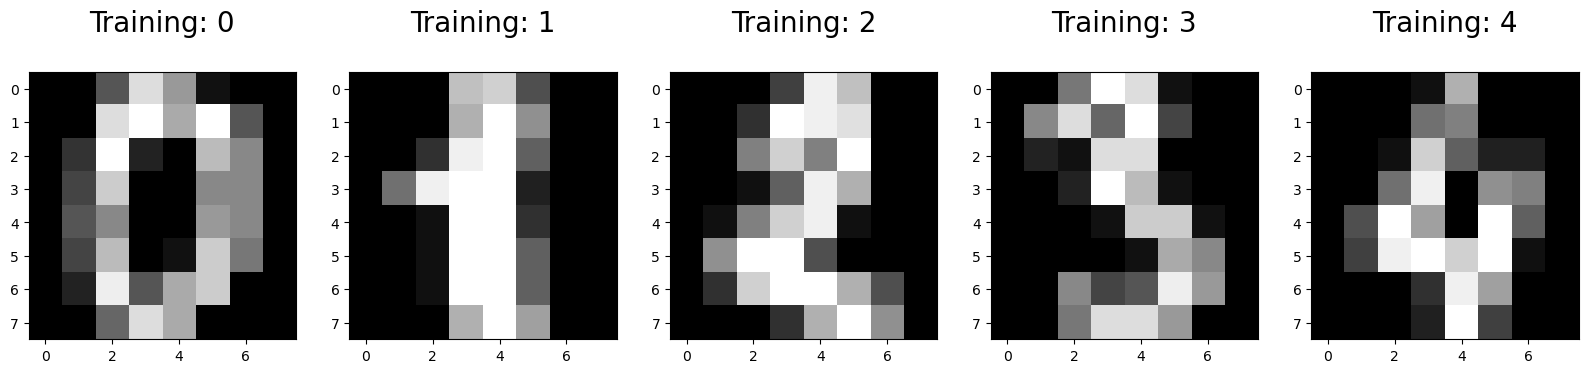

In [3]:
import numpy as np 
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

### Splitting Data into Training and Test Sets (Digits Dataset)

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

### Scikit-learn 4-Step Modeling Pattern (Digits Dataset)

**Step 1.** Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes

In [5]:
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV

**Step 2.** Make an instance of the Model

In [6]:
model= LogisticRegression(solver='liblinear')#solver='lbfgs'

In [7]:
model?

Type:        LogisticRegression
String form: LogisticRegression(solver='liblinear')
File:        ~/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py
Docstring:  
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit
floats for optimal performance; any other input format will be converted
(and copied).

The 'newton-cg', 'sag', and 'lbfgs' solvers support only L2 r

**Step 3.** Training the model on the data, storing the information learned from the data

Model is learning the relationship between x (digits) and y (labels)

In [8]:
x_train.shape

(1347, 64)

In [9]:
model.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

**Step 4.** Predict the labels of new data (new images)

Uses the information the model learned during the model training process

In [10]:
# Returns a NumPy Array
# Predict for One Observation (image)
model.predict(x_test[0].reshape(1,-1))

array([2])

In [11]:
model.predict_proba(x_test[0].reshape(1,-1))

array([[2.04008933e-09, 8.59968006e-11, 9.99996463e-01, 1.99696348e-15,
        2.97412997e-11, 3.32611491e-09, 6.19741296e-21, 8.78183466e-09,
        3.52229034e-06, 1.11455862e-11]])

In [12]:
# Predict for Multiple Observations (images) at Once
model.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [13]:
# Predict for Multiple Observations (images) at Once
model.predict_proba(x_test[0:10])

array([[2.04008933e-09, 8.59968006e-11, 9.99996463e-01, 1.99696348e-15,
        2.97412997e-11, 3.32611491e-09, 6.19741296e-21, 8.78183466e-09,
        3.52229034e-06, 1.11455862e-11],
       [3.28368770e-10, 1.21495778e-06, 7.23997541e-06, 4.26619136e-19,
        3.03556179e-01, 7.35714782e-07, 1.90562187e-07, 5.02696153e-11,
        6.96434438e-01, 1.83446110e-09],
       [2.57674313e-16, 3.68084347e-10, 9.99997685e-01, 5.63218575e-13,
        1.49894719e-12, 5.50787995e-09, 1.57148804e-18, 1.40550325e-10,
        2.30929078e-06, 2.28628432e-12],
       [8.24169507e-08, 4.65744603e-09, 5.99162475e-10, 3.61267320e-14,
        2.55653401e-02, 5.84422431e-06, 7.57487264e-01, 1.32625870e-09,
        2.16941463e-01, 1.83458922e-24],
       [6.00372326e-05, 2.62479493e-09, 2.40925683e-08, 7.08534572e-12,
        8.03041732e-07, 2.56525643e-07, 9.77864473e-01, 1.60434574e-08,
        2.20743876e-02, 1.62058394e-15],
       [1.49022955e-09, 5.83165362e-05, 5.52269885e-06, 2.12436210e-10,
   

In [14]:
# Make predictions on entire test data
predictions = model.predict(x_test)

### Measuring Model Performance (Digits Dataset)

While there are other ways of measuring model performance, we are going to keep this simple and use accuracy as our metric. 
To do this are going to see how the model performs on the new data (test set)

accuracy is defined as: 

(fraction of correct predictions): correct predictions / total number of data points

In [15]:
# Use score method to get accuracy of model
score = model.score(x_test, y_test)
print(score)

0.9533333333333334


## Cross Validation

In [16]:
from sklearn import metrics

In [17]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

In [18]:
searchCV = LogisticRegressionCV(
    penalty='l2'
    ,scoring='roc_auc_ovr'
    ,random_state=777
    ,max_iter=10000
    ,fit_intercept=True
    ,solver='lbfgs'
    ,tol=10
)


In [19]:
searchCV.fit(x_train, y_train)

print ('Max auc_roc:', searchCV.scores_[1].max())

Max auc_roc: 0.9997672663558331


### Confusion Matrix (Digits Dataset)

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. In this section, I am just showing two python packages (Seaborn and Matplotlib) for making confusion matrixes. 

In [20]:
import numpy as np 

import seaborn as sns


**Method 1 (Seaborn)**

In [21]:
cm = metrics.confusion_matrix(y_test, predictions)

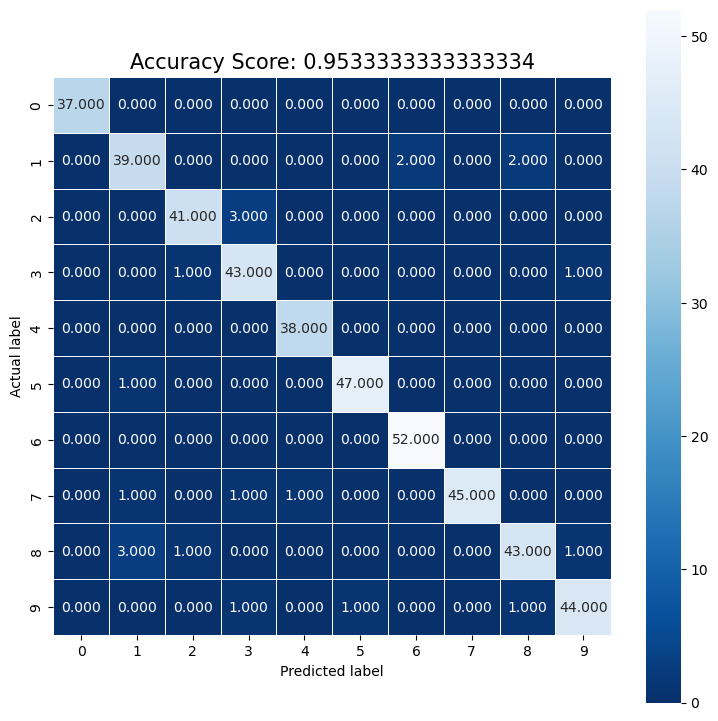

In [22]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
#plt.show();


**Method 2 (Matplotlib)**

This method is clearly a lot more code. I just wanted to show people how to do it in matplotlib as well. 

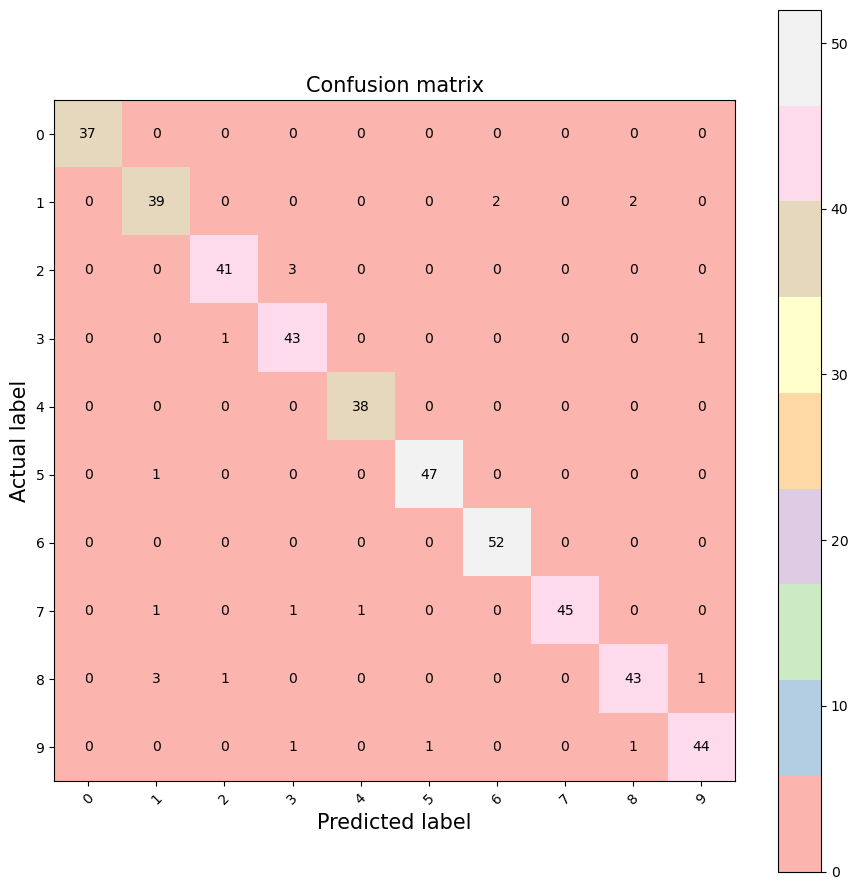

In [23]:
cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape

for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')
plt.savefig('toy_Digits_ConfusionMatplotlibCodementor.png')
#plt.show()